# Install and Load Library

In [50]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

%matplotlib inline

# Load Dataset

In [51]:
ecommerce_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/ecommerce/data.csv", encoding="latin-1")

daily_website_visitors = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/daily_website_visitors/daily-website-visitors.csv",  thousands=",")

air_passengers = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/air_passanger_data/AirPassengers.csv")

**E-commerce Data**

In [52]:
# check data structure
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [53]:
# check the first 5 of rows
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Daily Website Visitors**

In [54]:
# check data structure
daily_website_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   int64 
 5   Unique.Visits      2167 non-null   int64 
 6   First.Time.Visits  2167 non-null   int64 
 7   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 135.6+ KB


In [55]:
# check the first 5 of rows
daily_website_visitors.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236


**Air Passengers**

In [56]:
# check data structure
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [57]:
# check the first 5 rows
air_passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Simple Data Aggregation

**E-Commerce Data**

In [58]:
# create invoice_date column
ecommerce_data['invoice_date'] = pd.to_datetime(ecommerce_data.InvoiceDate).dt.normalize()

# create gmv column based on UnitPrice * Quantity
ecommerce_data["gmv"] = ecommerce_data["UnitPrice"] * ecommerce_data["Quantity"]

In [59]:
# Aggregate data
ecommerce_data = ecommerce_data.groupby('invoice_date', as_index=False).agg({
    "InvoiceNo": 'nunique',
    "CustomerID": 'nunique',
    "gmv": 'sum'
}).query("gmv > 0")

In [60]:
# Renaming
ecommerce_data = ecommerce_data.rename(columns={
    "InvoiceNo": "Total TRX",
    "CustomerID": "Total Buyer",
    "gmv": "GMV"
})

In [61]:
# check the first 5 rows
ecommerce_data.head()

,invoice_date,Total TRX,Total Buyer,GMV
0,2010-12-01,143,98,58635.56
1,2010-12-02,167,117,46207.28
2,2010-12-03,108,55,45620.46
3,2010-12-05,95,76,31383.95
4,2010-12-06,133,90,53860.18


In [62]:
# check data structure
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 304
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_date  304 non-null    datetime64[ns]
 1   Total TRX     304 non-null    int64         
 2   Total Buyer   304 non-null    int64         
 3   GMV           304 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 11.9 KB


**Daily Website Visitor**

In [63]:
# Change Date to date type
daily_website_visitors["Date"] = pd.to_datetime(daily_website_visitors["Date"]).dt.normalize()

In [65]:
# renaming and select certain columns
daily_website_visitors = daily_website_visitors.rename(columns={
    "Page.Loads": "Page Loads",
    "Unique.Visits": "Unique Visits",
    "First.Time.Visits": "First Time Visits",
    "Returning.Visits": "Returning Visits"
})[["Date", "Page Loads", "Unique Visits", "First Time Visits", "Returning Visits"]]

In [66]:
# check the first 5 rows
daily_website_visitors.head()

,Date,Page Loads,Unique Visits,First Time Visits,Returning Visits
0,2014-09-14,2146,1582,1430,152
1,2014-09-15,3621,2528,2297,231
2,2014-09-16,3698,2630,2352,278
3,2014-09-17,3667,2614,2327,287
4,2014-09-18,3316,2366,2130,236


In [67]:
# check data structure
daily_website_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2167 non-null   datetime64[ns]
 1   Page Loads         2167 non-null   int64         
 2   Unique Visits      2167 non-null   int64         
 3   First Time Visits  2167 non-null   int64         
 4   Returning Visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 84.8 KB


**Air Passengers**

In [68]:
# change month column to date type
air_passengers['Month'] = pd.to_datetime(air_passengers['Month'], format="%Y-%m")

In [69]:
# renaming certain column
air_passengers = air_passengers.rename(columns={
    "#Passengers": "Total Passengers",
    "Month": "Date"
})

In [70]:
# check the first 5 rows
air_passengers.head()

,Date,Total Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [71]:
# check data structure
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              144 non-null    datetime64[ns]
 1   Total Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


# Exploratory Method for Time Series

## Simple Line Chart

**Air Passengers**

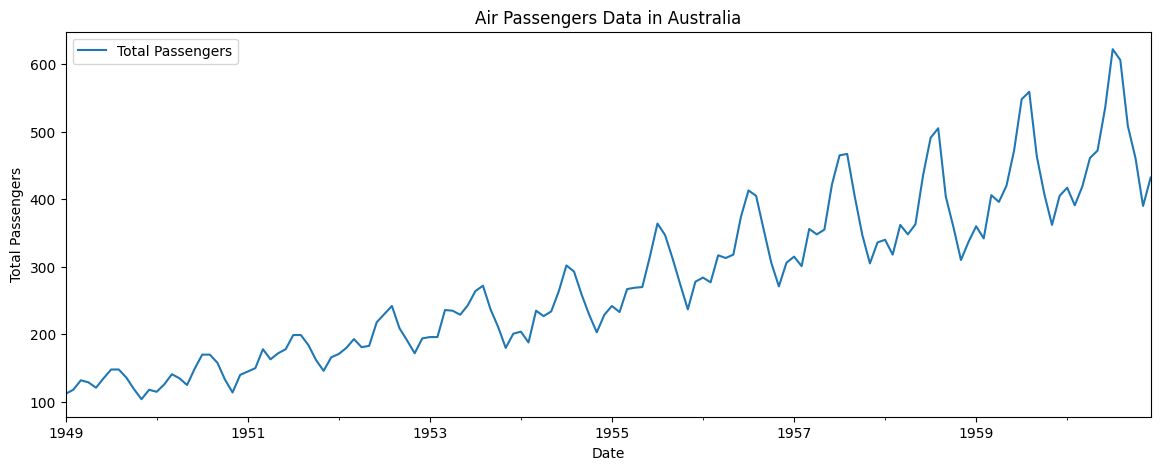

In [73]:
# simple line chart

air_passengers.plot(
    x = 'Date',
    y = 'Total Passengers',
    figsize = (14,5)
)
plt.title("Air Passengers Data in Australia")
plt.ylabel("Total Passengers")
plt.show()

**Daily Website Visitors**

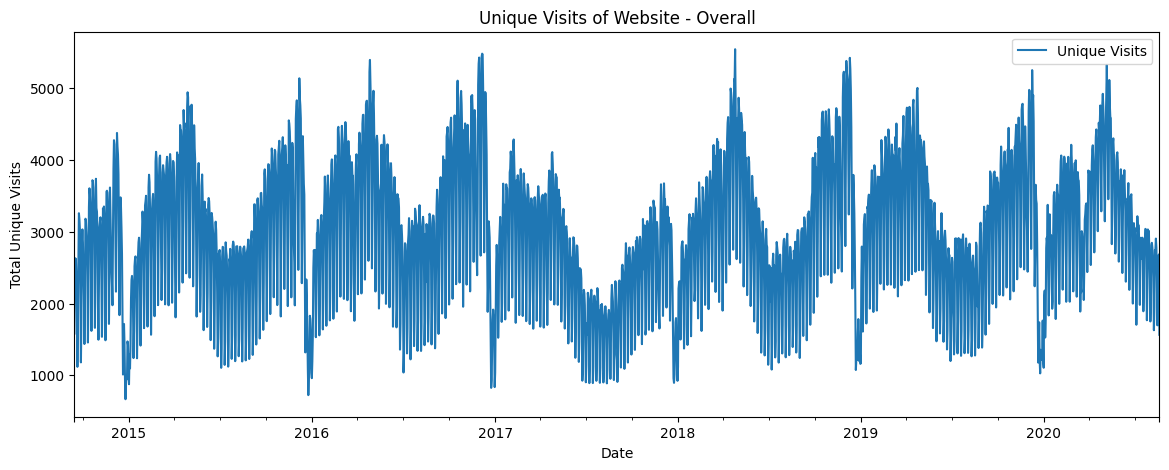

In [74]:
# simple line chart
daily_website_visitors.plot(
    x = "Date",
    y = "Unique Visits",
    figsize = (14,5)
)
plt.ylabel("Total Unique Visits")
plt.title("Unique Visits of Website - Overall")
plt.show()

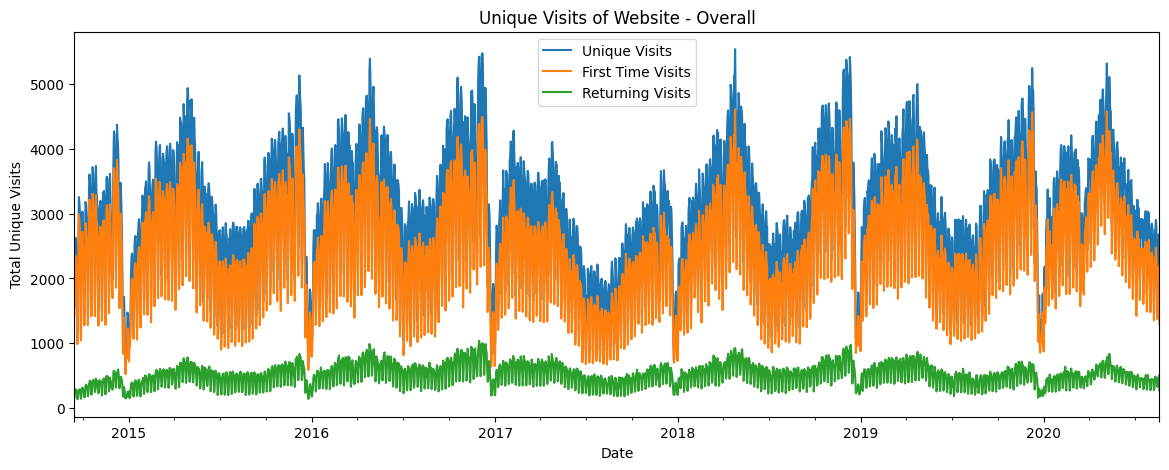

In [75]:
# grouped line chart
daily_website_visitors.plot(
    "Date", ["Unique Visits", "First Time Visits", "Returning Visits"],
    figsize=(14,5)
)
plt.ylabel("Total Unique Visits")
plt.title("Unique Visits of Website - Overall")
plt.show()

## Seasonal Plot

**Air Passengers**

In [76]:
# create month and year column
air_passengers['Month'] = air_passengers['Date'].dt.month
air_passengers['Year'] = air_passengers['Date'].dt.year

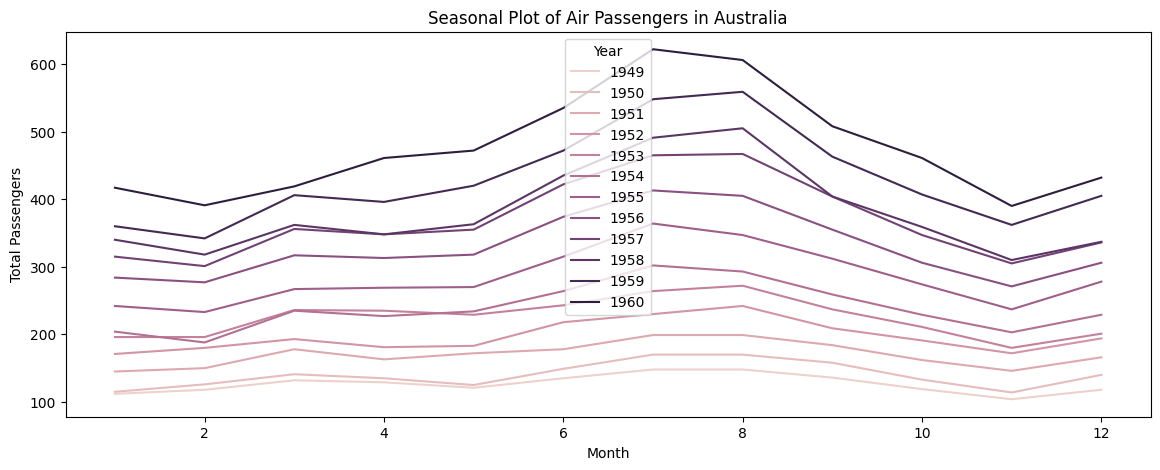

In [77]:
# create seasonal plot
plt.figure(figsize=(14,5))
sns.lineplot(
    data = air_passengers,
    x = 'Month',
    y = 'Total Passengers',
    hue = 'Year',
    legend = 'full'
)
plt.title("Seasonal Plot of Air Passengers in Australia")
plt.show()

**Daily Website Visitors**

In [78]:
# create month and year column
daily_website_visitors['Week'] = daily_website_visitors['Date'].dt.weekday
daily_website_visitors['Month'] = daily_website_visitors['Date'].dt.month
daily_website_visitors['Year'] = daily_website_visitors['Date'].dt.year

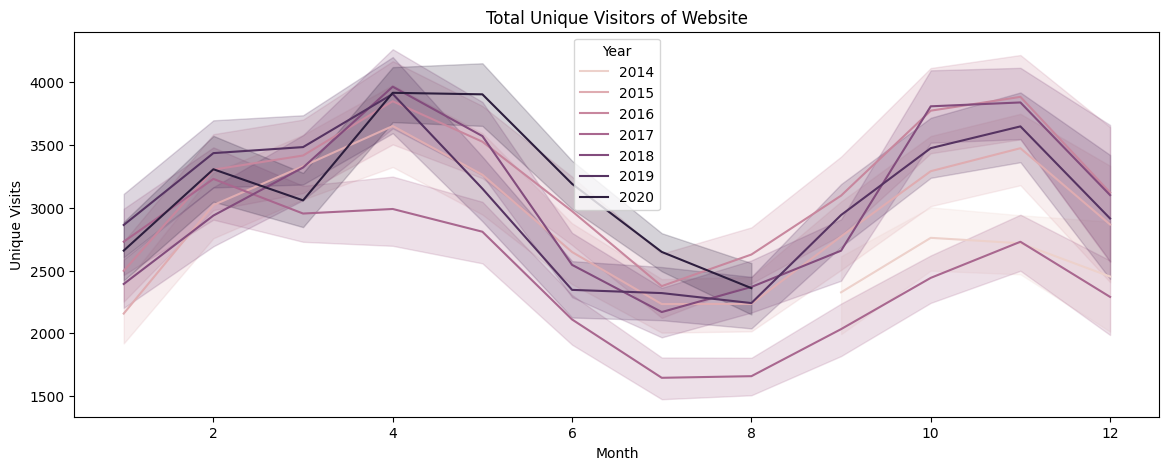

In [79]:
# create seasonal plot - monthly
plt.figure(figsize=(14,5))
sns.lineplot(
    data = daily_website_visitors,
    x = 'Month',
    y = 'Unique Visits',
    hue = 'Year',
    legend = 'full'
)
plt.title("Total Unique Visitors of Website")
plt.show()

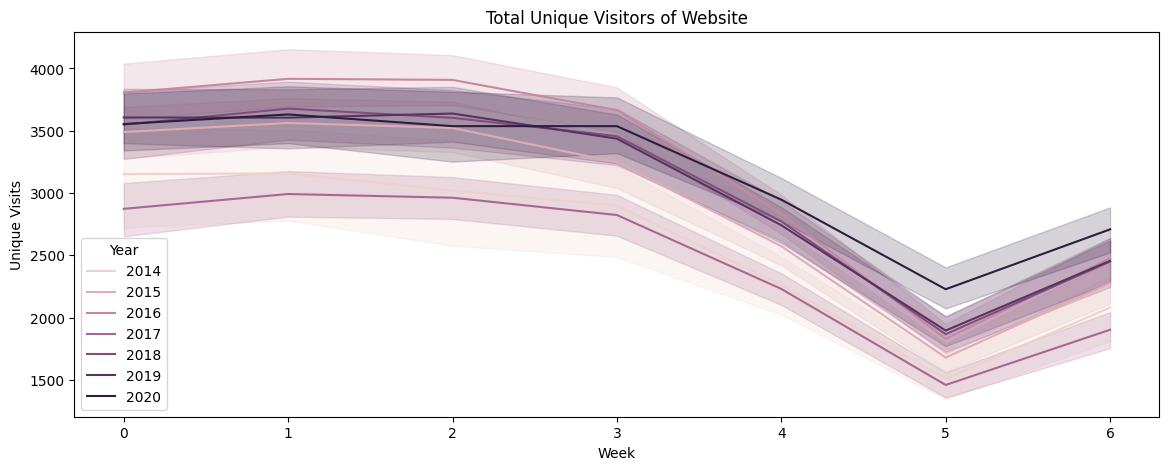

In [80]:
# create seasonal plot - weekly
plt.figure(figsize=(14,5))
sns.lineplot(
    data = daily_website_visitors,
    x = 'Week',
    y = 'Unique Visits',
    hue = 'Year',
    legend = 'full'
)
plt.title("Total Unique Visitors of Website")
plt.show()

## Month Plot

In [81]:
# create new data named month_data
month_data = air_passengers.set_index('Date')
month_data.index = pd.DatetimeIndex(month_data.index, freq = 'MS')

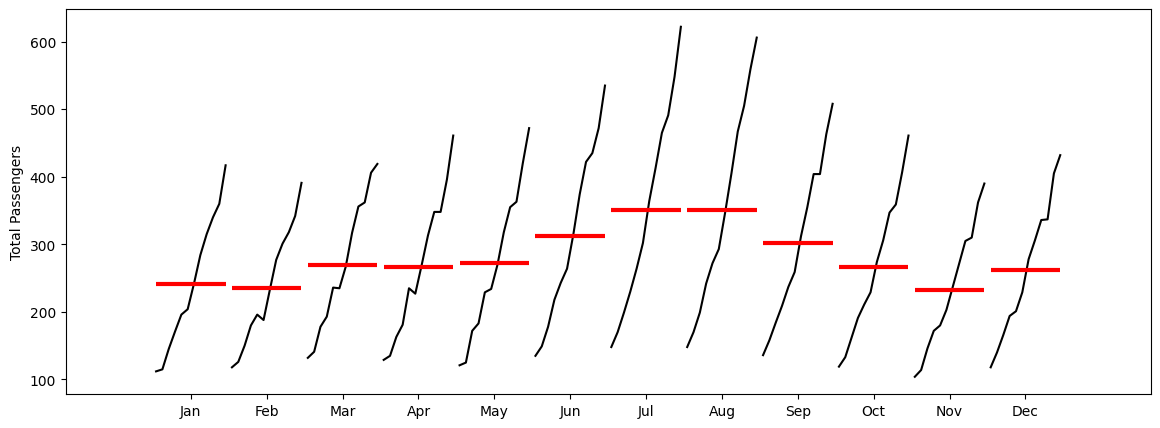

In [82]:
# create month plot
month_plot(
    month_data['Total Passengers'],
    ylabel = 'Total Passengers'
).set_size_inches((14,5))

plt.show()

## Lag Plot

**Air Passengers**

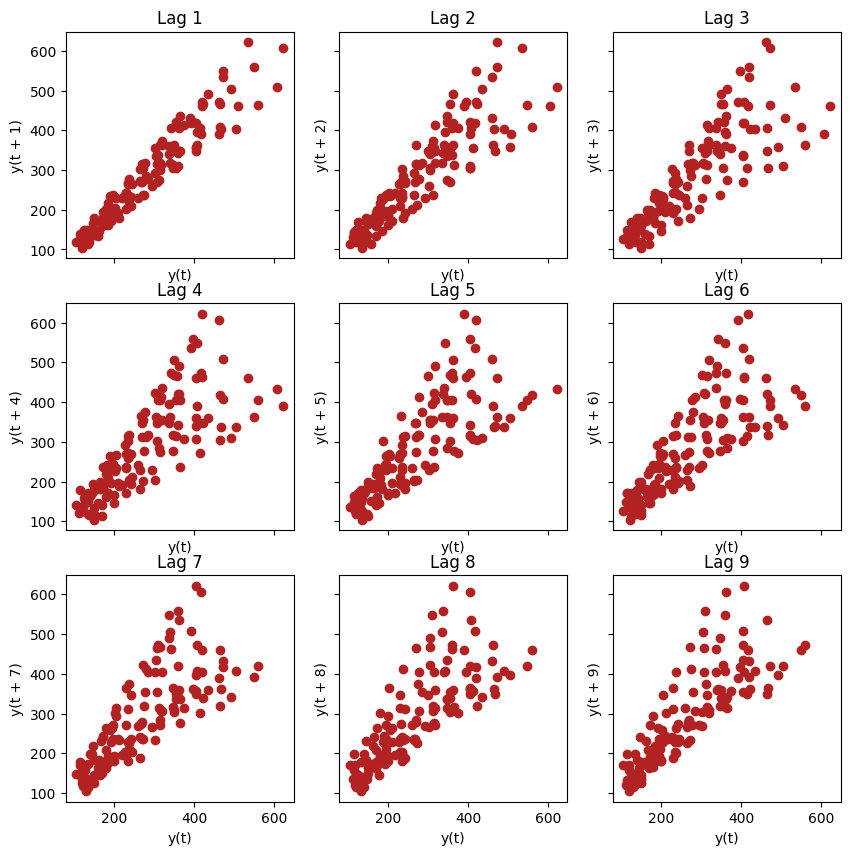

In [83]:
# create lag plot from 1 to 9
# Plot
fig, axes = plt.subplots(nrows = 3, ncols=3, figsize=(10,10), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(air_passengers['Total Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
plt.show()

## ACF & PACF

**Air Passengers**

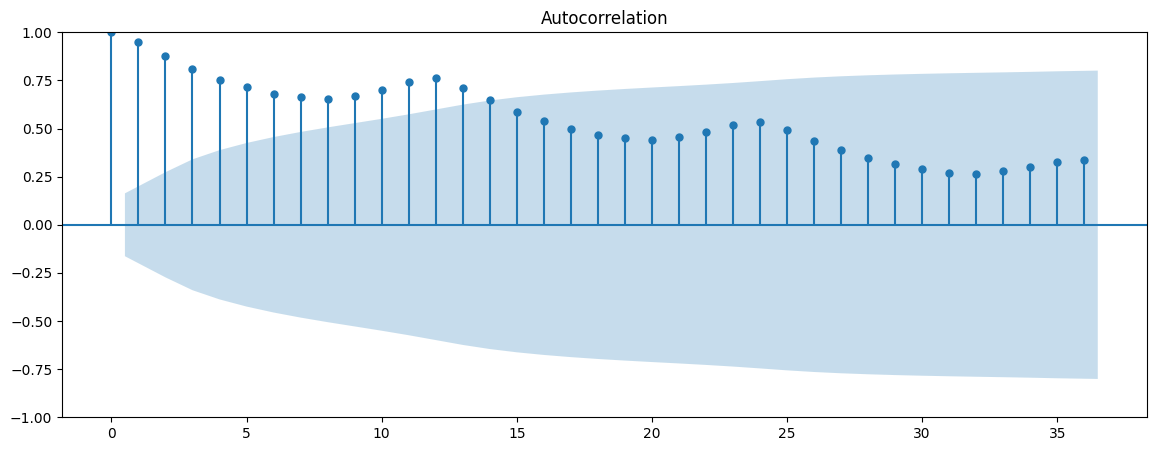

In [84]:
# ACF plot
plot_acf(
    air_passengers['Total Passengers'],
    lags = 36
).set_size_inches((14,5));

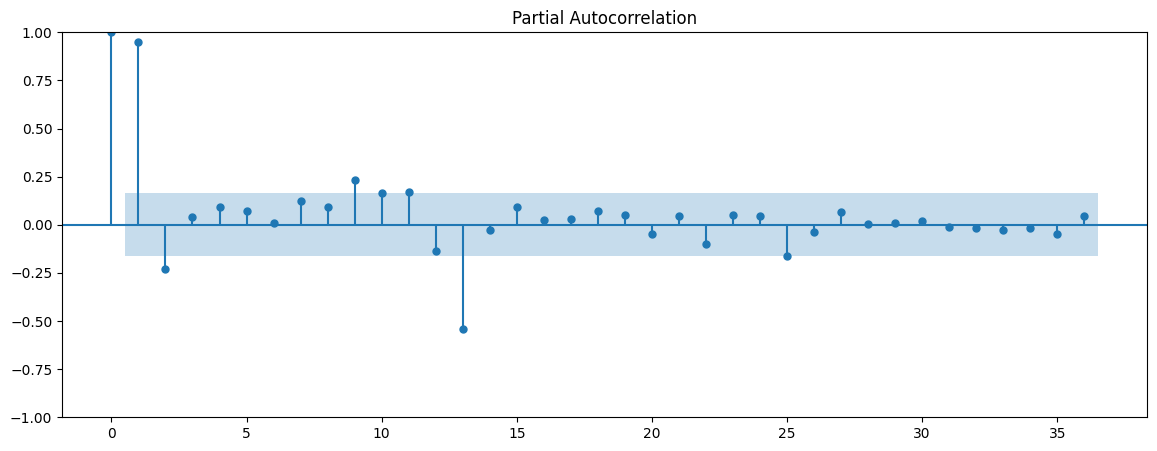

In [85]:
# PACF plot
plot_pacf(
    air_passengers['Total Passengers'],
    lags = 36
).set_size_inches((14,5));

**Daily Website Visitors**

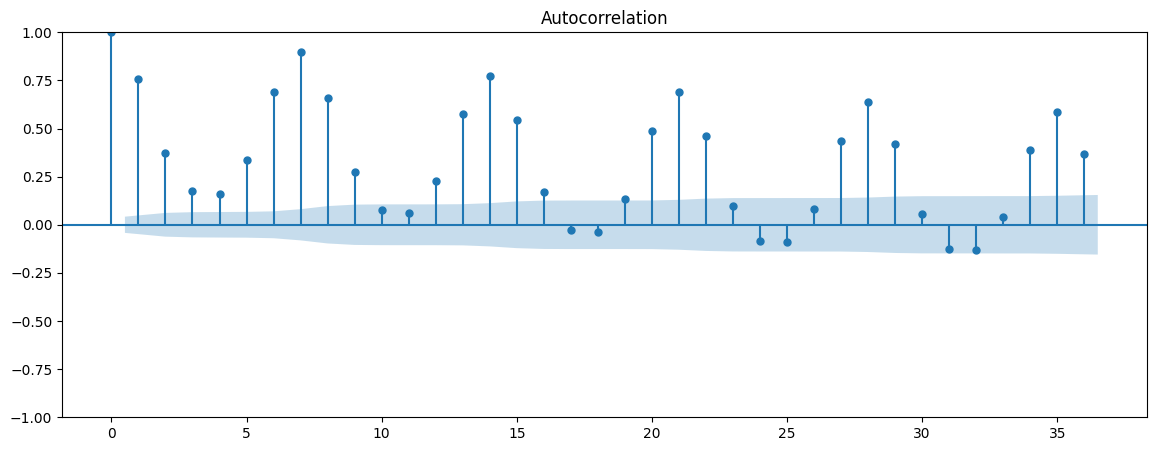

In [87]:
# ACF plot
plot_acf(
    daily_website_visitors['Unique Visits'],
    lags = 36
).set_size_inches((14,5));

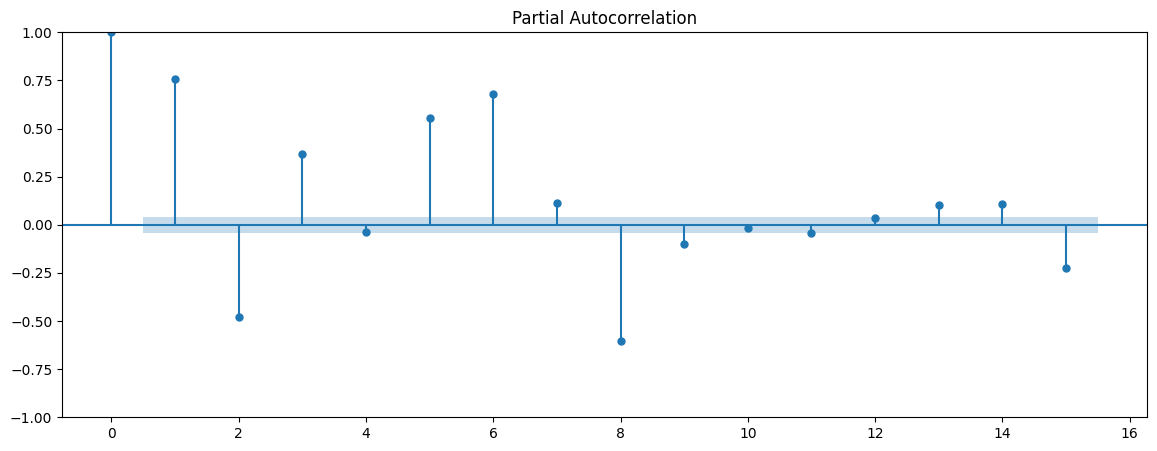

In [88]:
# PACF plot
plot_pacf(
    daily_website_visitors['Unique Visits'],
    lags = 15
).set_size_inches((14,5));

## Task

**Find ACF and PACF for multiple metrics in daily_website_visitors data**

# Time Series Decomposition

**Air Passengers**

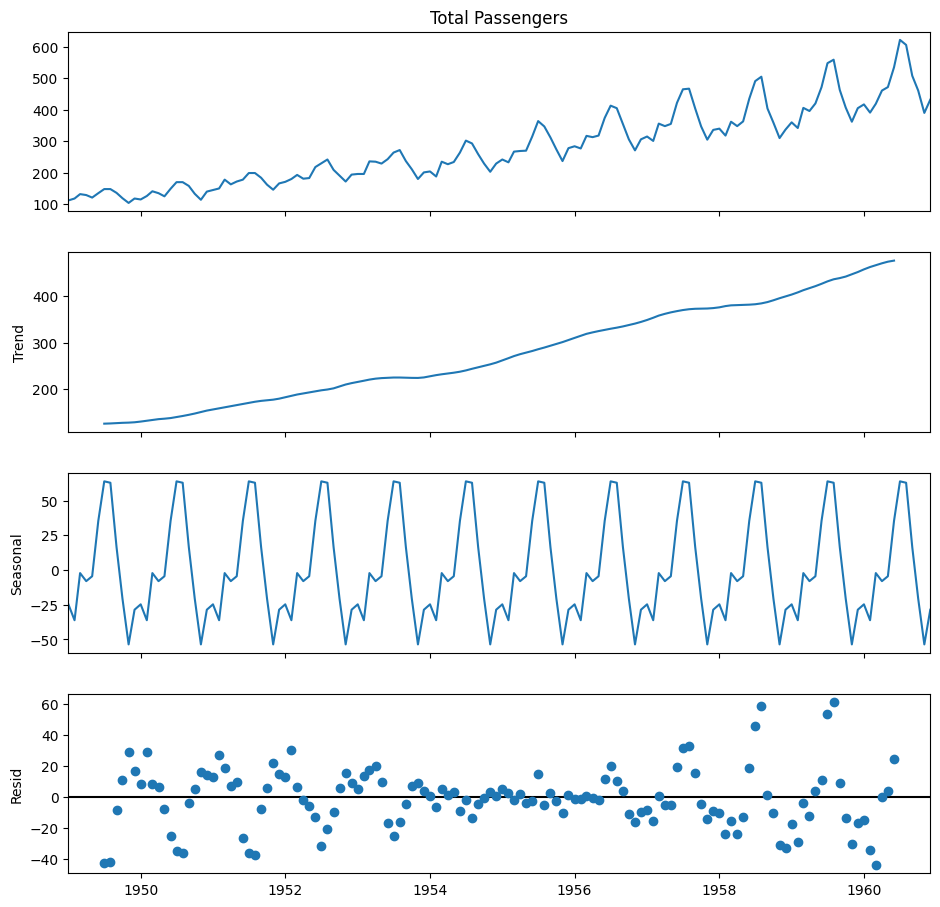

In [37]:
decompose = sm.tsa.seasonal_decompose(
    month_data['Total Passengers'],
    model = 'additive'
)
decompose.plot().set_size_inches((10,10))

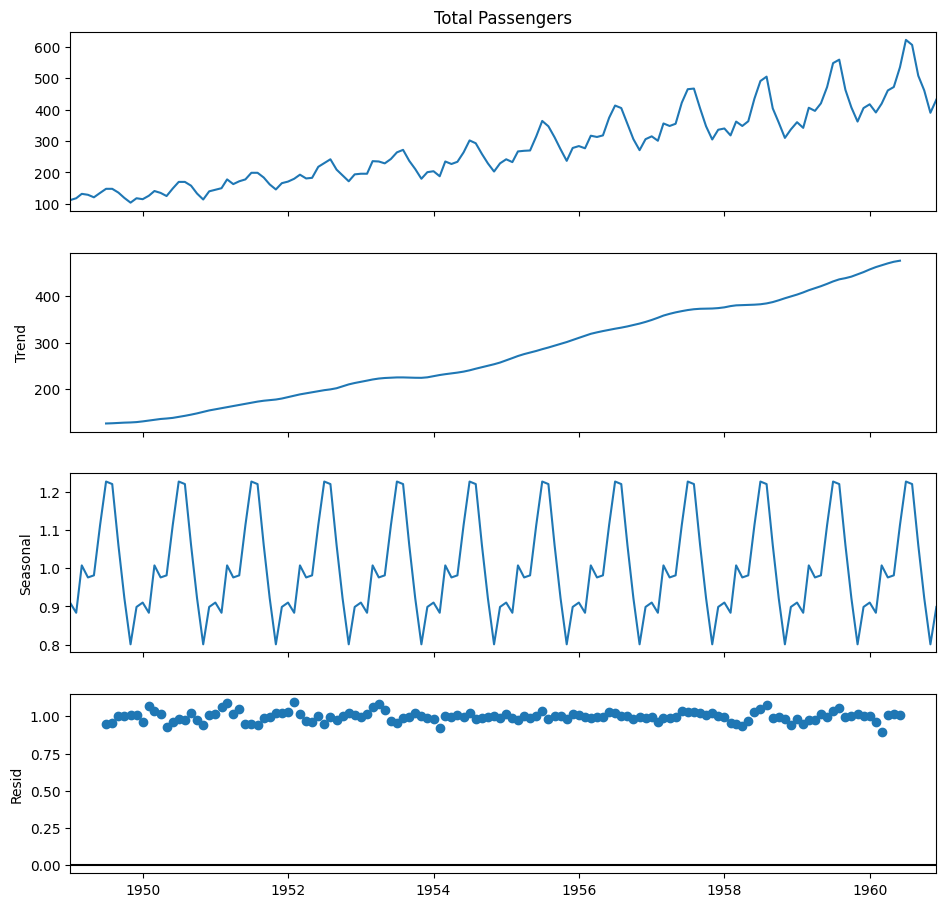

In [38]:
decompose = sm.tsa.seasonal_decompose(
    month_data['Total Passengers'],
    model = 'multiplicative'
)
decompose.plot().set_size_inches((10,10))

# Time Series Transformation

## Differencing

**Before Differencing**

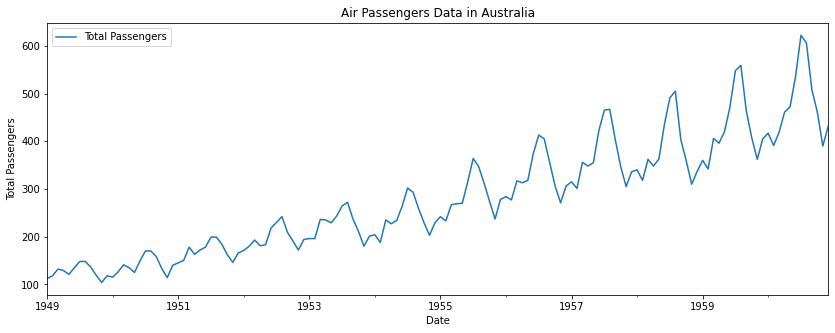

In [ ]:
# create line plot
air_passengers.plot(
    x = 'Date',
    y = 'Total Passengers',
    figsize = (14,5)
)
plt.title("Air Passengers Data in Australia")
plt.ylabel("Total Passengers")
plt.show()

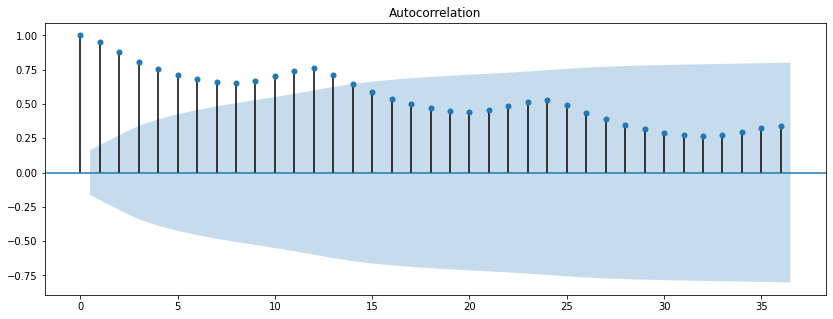

In [ ]:
# ACF plot
plot_acf(
    air_passengers['Total Passengers'],
    lags = 36
).set_size_inches((14,5));

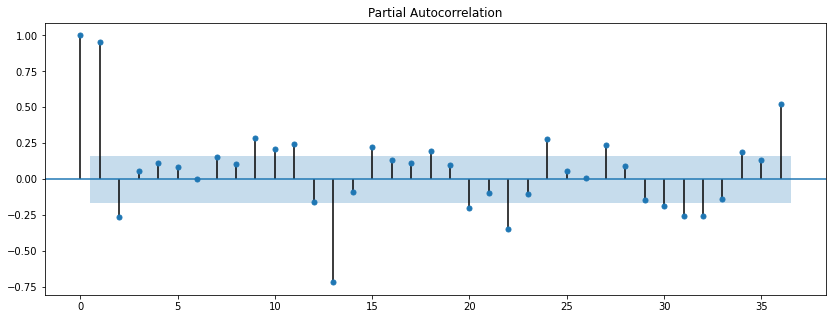

In [ ]:
# PACF plot
plot_pacf(
    air_passengers['Total Passengers'],
    lags = 36
).set_size_inches((14,5));

**After Differencing - 1st Order**

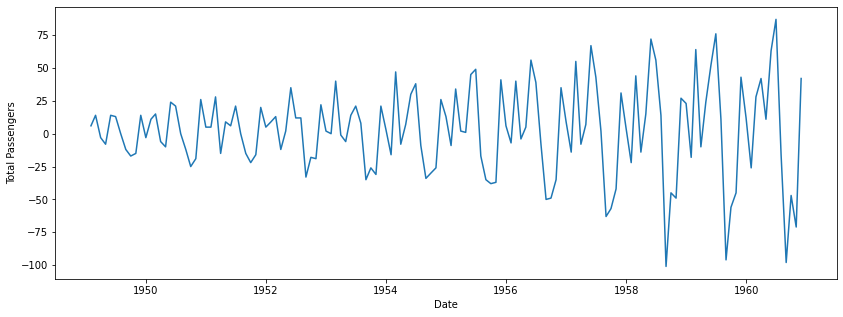

In [ ]:
# create line plot
plt.figure(figsize=(14,5))
sns.lineplot(
    x = air_passengers['Date'],
    y = air_passengers['Total Passengers'].diff(),
    sizes = (14,5)
);

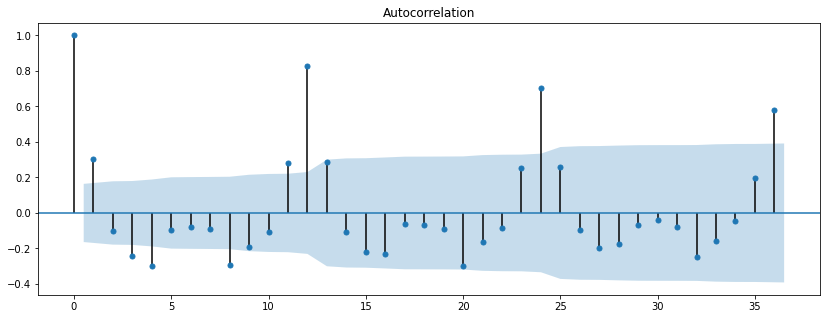

In [ ]:
# ACF plot
plot_acf(
    air_passengers['Total Passengers'].diff().dropna(),
    lags = 36
).set_size_inches((14,5));

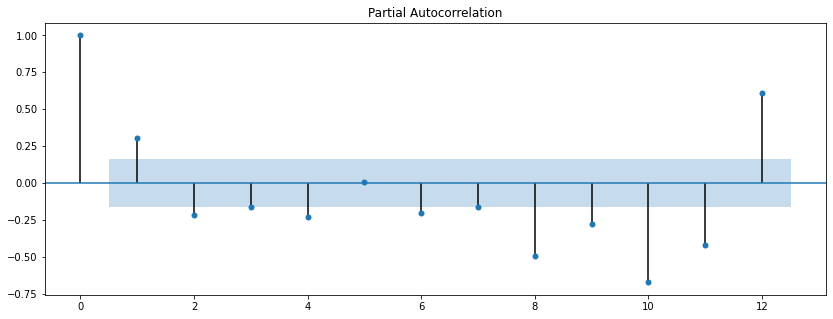

In [ ]:
# PACF plot
plot_pacf(
    air_passengers['Total Passengers'].diff().dropna(),
    lags = 36
).set_size_inches((14,5));

**After Differencing - 2nd Order**

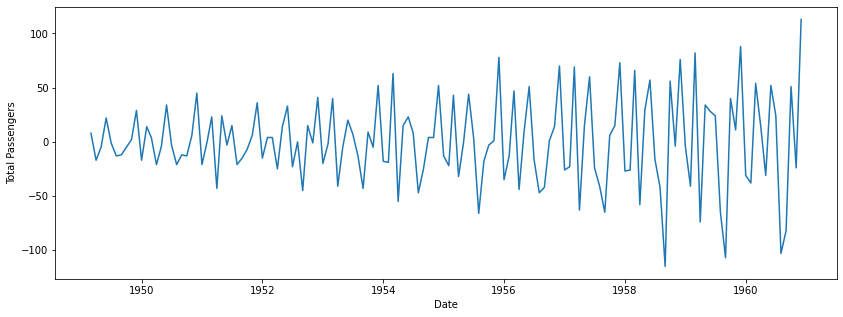

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(
    x = air_passengers['Date'],
    y = air_passengers['Total Passengers'].diff().diff(),
    sizes = (14,5)
);

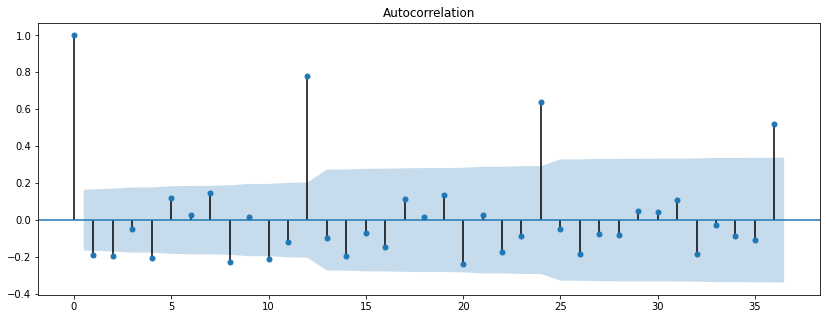

In [ ]:
# ACF plot
plot_acf(
    air_passengers['Total Passengers'].diff().diff().dropna(),
    lags = 36
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


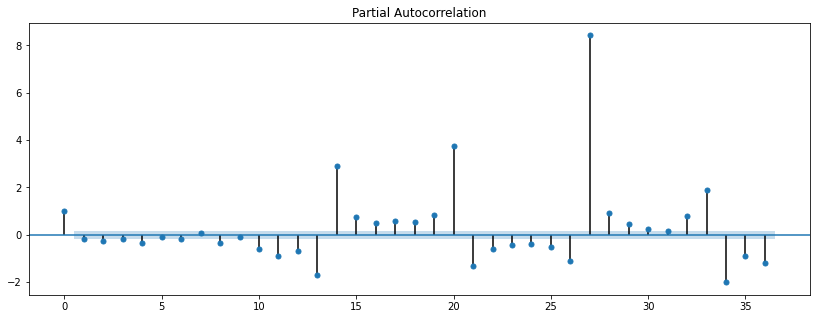

In [ ]:
# PACF plot
plot_pacf(
    air_passengers['Total Passengers'].diff().diff().dropna(),
    lags = 36
).set_size_inches((14,5));

# Unit Root Test

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**

- *Null hypothesis*: The process is trend stationary
- *Alternate hypothesis*: The series has a unit root (series is not stationary)

Reject null hypothesis if **p-value less than 5%**

In [ ]:
# define jpss_test function
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, lags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [ ]:
kpss_test(air_passengers['Total Passengers'])

Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**Interpretation**: p-value less than 0.05, there is evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is non-stationary.

**Augmented Dickey-Fuller Test**

- *Null hypothesis*: The series has a unit root.

- *Alternate Hypothesis*: The series has no unit root.

Reject H0 if **p-value greater than 5%**

In [ ]:
# define adf_test function
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
adf_test(air_passengers['Total Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


**Interpretation**: Because p-value greater than 0.05, there is no evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is non-stationary.

## Task

Do 1st order differencing and test the data either with ADF or KPSS test

In [ ]:
ecommerce_data

# Time Series Regression Model

**E-Commerce Data**

In [ ]:
# create new dataset: ecommerce_data_new
ecommerce_data_new = ecommerce_data.set_index('invoice_date')[
  # select certaina columns
  ['Total TRX', 'GMV', 'Total Buyer']
].pct_change().dropna().copy()

In [ ]:
ecommerce_data_new.head()

,Total TRX,GMV,Total Buyer
invoice_date,,,
2010-12-02,0.167832,-0.211958,0.193878
2010-12-03,-0.353293,-0.012700,-0.529915
2010-12-05,-0.120370,-0.312064,0.381818
2010-12-06,0.400000,0.716170,0.184211
2010-12-07,-0.165414,-0.163407,-0.222222


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


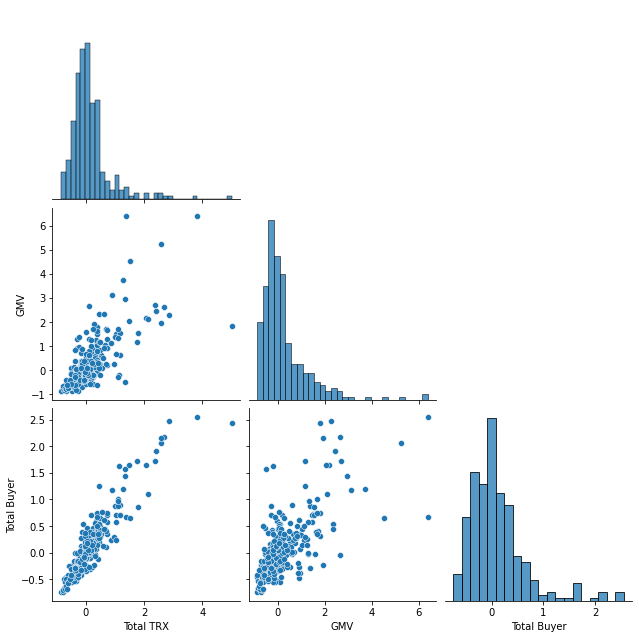

In [ ]:
sns.pairplot(ecommerce_data_new, corner=True, size = 3);

**Build Linear Regression Model**

In [ ]:
model = sm.OLS(ecommerce_data_new['Total TRX'], ecommerce_data_new['Total Buyer'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              Total TRX   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              1699.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                   5.06e-126
Time:                        04:33:53   Log-Likelihood:                         -39.326
No. Observations:                 303   AIC:                                      80.65
Df Residuals:                     302   BIC:                                      84.37
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

**Visualize Regression**

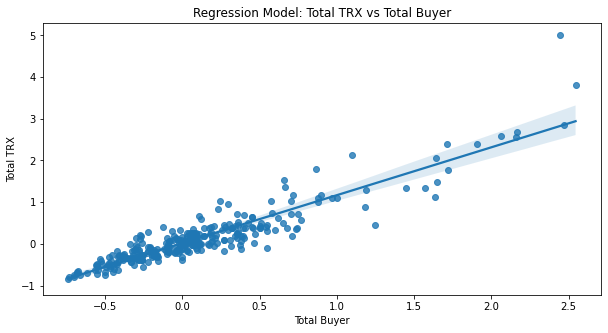

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(
    x = ecommerce_data_new['Total Buyer'],
    y = ecommerce_data_new['Total TRX']
)
plt.title("Regression Model: Total TRX vs Total Buyer")
plt.show()

In [ ]:
ecommerce_data_new['TRX Pred'] = results.predict(ecommerce_data_new['Total Buyer'])

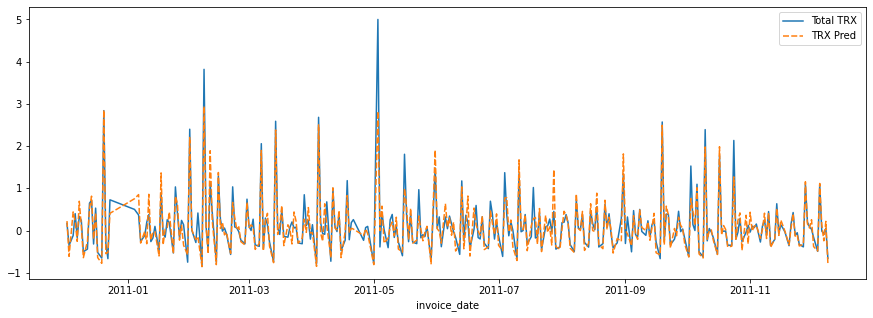

In [ ]:
# Real data vs prediction
plt.figure(figsize=(15,5))
sns.lineplot(
    data = ecommerce_data_new[['Total TRX', 'TRX Pred']]
)
plt.show()

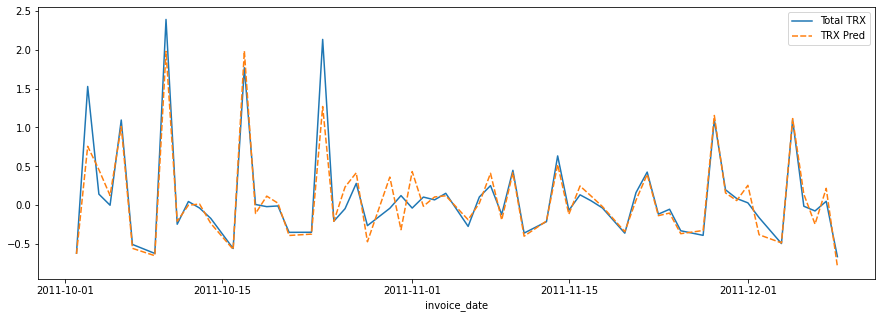

In [ ]:
# Real data vs prediction after or on 2011-10-01
plt.figure(figsize=(15,5))
sns.lineplot(
    data = ecommerce_data_new[ecommerce_data_new.index >= "2011-10-01"][['Total TRX', 'TRX Pred']]
)
plt.show()

**Model Diagnostics**

**Normality of Residuals**

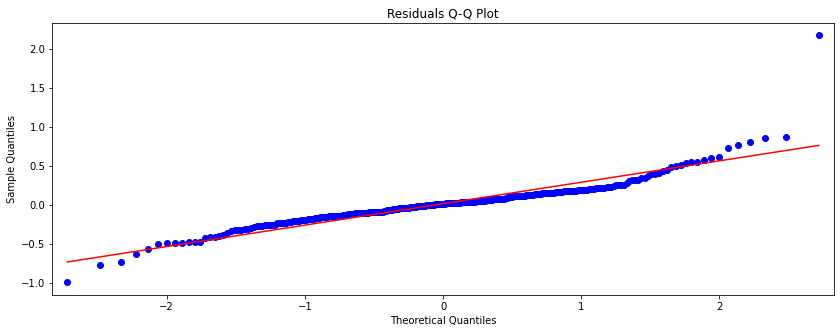

In [ ]:
sm.qqplot(results.resid, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

**Residuals vs Fitted**

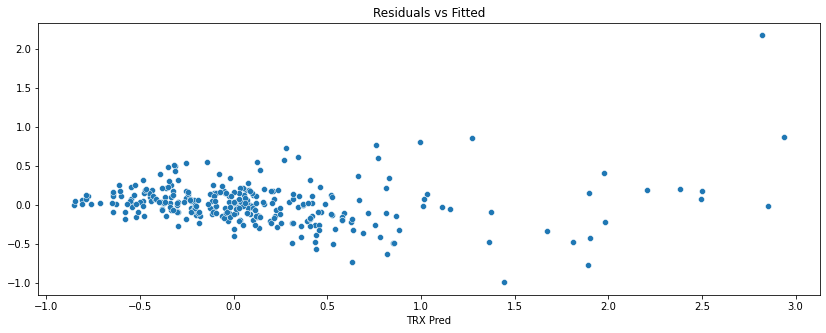

In [ ]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    x = ecommerce_data_new['TRX Pred'],
    y = results.resid
)
plt.title("Residuals vs Fitted")
plt.show()

**Interpretation**: Based on the visualization of residuals vs fitted, we can infer that there is heteroscedasticity.

**Residual Random Walk Pattern**

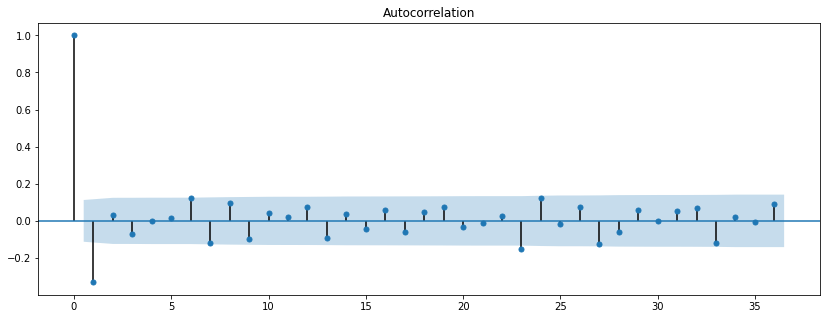

In [ ]:
# ACF plot
plot_acf(
    results.resid,
    lags = 36
).set_size_inches((14,5));

**Interpretation**: Based on ACF of residual, we can observe that there is significant lag at 1, then the residual is not random walk

## Task

We had heteroscedasticity problem! Now, we need to fix the data by doing transformation. Check if one of these transformation can fix heteroscedasticity problem:

1. Log-transform
2. Square-root transform

In [ ]:
# create new dataset: ecommerce_data_new
ecommerce_data_new = ecommerce_data.set_index('invoice_date')[
  # select certaina columns
  ['Total TRX', 'GMV', 'Total Buyer']
]

In [ ]:
ecommerce_data_new['Total TRX'] = np.log(ecommerce_data_new['Total TRX'])

In [ ]:
ecommerce_data_new['GMV'] = np.log(ecommerce_data_new['GMV'])
ecommerce_data_new['Total Buyer'] = np.log(ecommerce_data_new['Total Buyer'])

In [ ]:
ecommerce_data_new = ecommerce_data_new.pct_change().dropna().copy()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


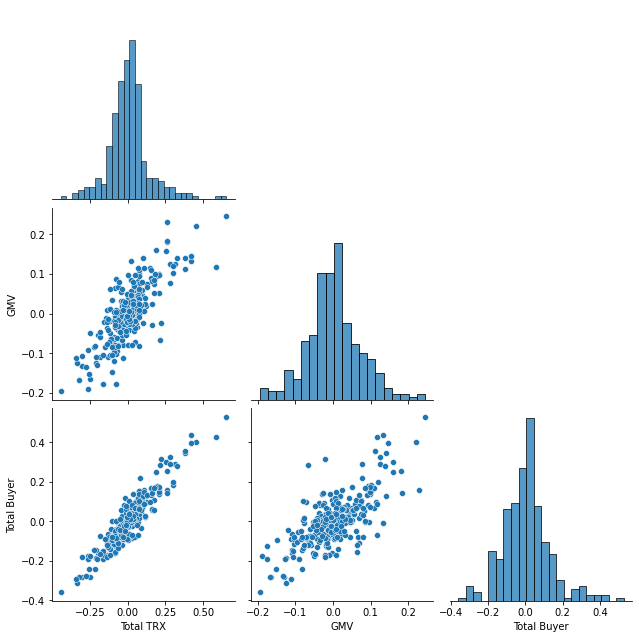

In [ ]:
sns.pairplot(ecommerce_data_new, corner=True, size = 3);

In [ ]:
model = sm.OLS(ecommerce_data_new['Total TRX'], ecommerce_data_new['Total Buyer'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              Total TRX   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              2018.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                   9.39e-136
Time:                        04:48:36   Log-Likelihood:                          482.51
No. Observations:                 303   AIC:                                     -963.0
Df Residuals:                     302   BIC:                                     -959.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
ecommerce_data_new['TRX Pred'] = results.predict(ecommerce_data_new['Total Buyer'])

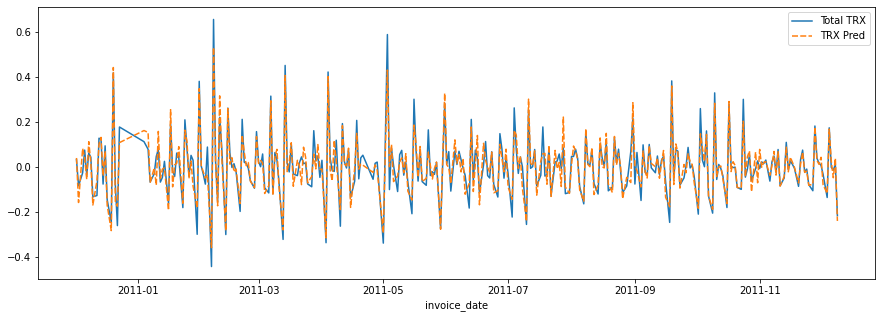

In [ ]:
# Real data vs prediction
plt.figure(figsize=(15,5))
sns.lineplot(
    data = ecommerce_data_new[['Total TRX', 'TRX Pred']]
)
plt.show()

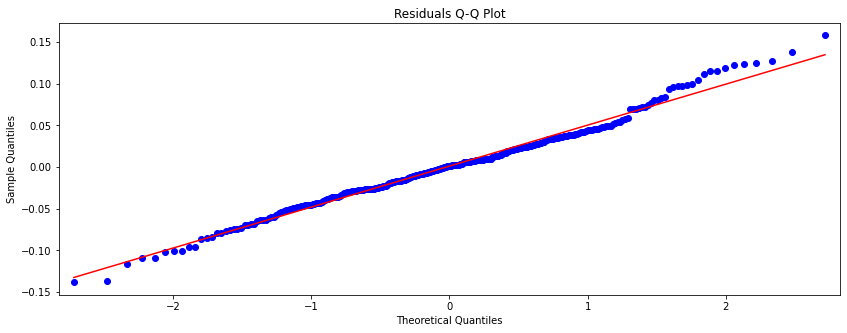

In [ ]:
sm.qqplot(results.resid, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

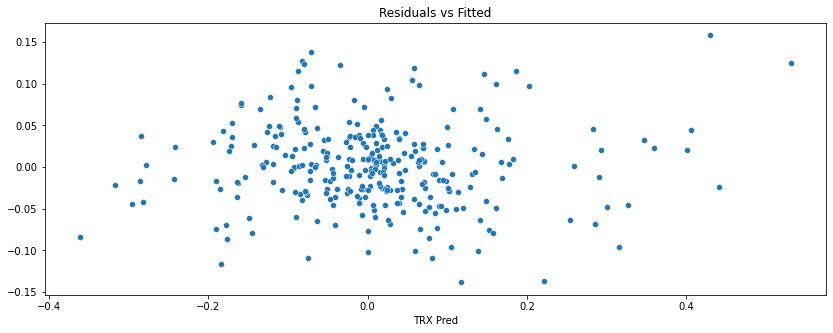

In [ ]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    x = ecommerce_data_new['TRX Pred'],
    y = results.resid
)
plt.title("Residuals vs Fitted")
plt.show()

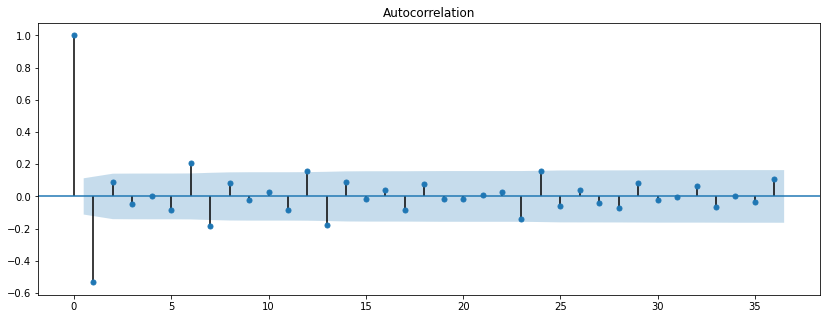

In [ ]:
# ACF plot
plot_acf(
    results.resid,
    lags = 36
).set_size_inches((14,5));